## Final Project Submission

Please fill out:
* Student name: Rachel Beery
* Student pace: Full time
* Scheduled project review date/time: 9/21/2020 5:00 P.M.
* Instructor name: James
* Blog post URL: www.


# Module 2 Final Project: King County Housing Authority 

**Objective:** In this project we will be finding the best model for interpretability so that our non-technical audience can understand the findings of our modeling. 

**Approach:** The OSEUMiN data science workflow is utilized to effectively create a model to find what factors can result in the most profitable house.

**Data:** The data used for this project was records of houses sold in King County Washington. The columns of data provided include:

* **id** - unique identifier for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zip code** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

**Audience:** Non-technical audience of homeowners within King County, Washington who are interested to know what they can do to improve their home to maximize the selling price of their homes.

Questions we will be answering in this notebook:

1. What outlier removal method is the most effective?

2. What effect does outliers have on our outcomes and overall data?

3. How will multicollinearity affect what feature yields the highest selling price?

4. What features of a house yield make the house sell at a higher price?

# Importing Packages & Our Data

In [1]:
#We begin by importing all the packages we will need to read and clean the datasets, analyze the data, and finally make visualizations 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import plotly.express as px
import math
import scipy.stats as stats
import missingno as ms

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
linreg = LinearRegression()

In [2]:
# Setting the display defaults
pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', None)

# Turning off scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
#Import data and see the headers
house_data = pd.read_csv(r"kc_house_data.csv")
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,nan,0.000,3,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0.0,1933,nan,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [4]:
# How many houses are in our dataset
house_data.shape

(21597, 21)

In [5]:
# Looking at our columns and seeing what data types they are
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


# Scrub

First I want to drop the columns/features that the home owner cannot change about their home. This will help in focusing on exploring and cleaning the data that I am interested in.

In [6]:
house_data = house_data.drop(columns=['id', 'waterfront', 'view', 'zipcode', 
                                      'lat', 'long', 'sqft_lot', 'yr_built', 'sqft_lot15'])

In [7]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
floors           21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_renovated     17755 non-null float64
sqft_living15    21597 non-null int64
dtypes: float64(4), int64(6), object(2)
memory usage: 2.0+ MB


In [8]:
# Changing dtypes that we know are numbers
house_data.price.astype('int64')

0         221900
1         538000
2         180000
3         604000
4         510000
5        1230000
6         257500
7         291850
8         229500
9         323000
10        662500
11        468000
12        310000
13        400000
14        530000
15        650000
16        395000
17        485000
18        189000
19        230000
20        385000
21       2000000
22        285000
23        252700
24        329000
25        233000
26        937000
27        667000
28        438000
29        719000
30        580500
31        280000
32        687500
33        535000
34        322500
35        696000
36        550000
37        640000
38        240000
39        605000
40        625000
41        775000
42        861990
43        685000
44        309000
45        488000
46        210490
47        785000
48        450000
49       1350000
50        228000
51        345000
52        600000
53        585000
54        920000
55        885000
56        292500
57        301000
58        9510

In [9]:
house_data.price.describe()

count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64

In [10]:
# Looking at all the object columns and seeing the unique values in each
objects = house_data.select_dtypes(include='object')
house_data.nunique()

date              372
price            3622
bedrooms           12
bathrooms          29
sqft_living      1034
floors              6
condition           5
grade              11
sqft_above        942
sqft_basement     304
yr_renovated       70
sqft_living15     777
dtype: int64

In [11]:
# Finding out where null values are in DF
nulls = house_data.isna().sum()
only_nulls = nulls[nulls>0]/len(house_data)
only_nulls.to_frame('Percent Null').style.background_gradient(cmap='Reds')
# Yr_renovated is the only one

,Percent Null
yr_renovated,0.177895


In [12]:
null_cols = list(only_nulls.index)
null_cols

['yr_renovated']

In [13]:
house_data[null_cols].mode()

,yr_renovated
0,0.000


In [14]:
house_data[null_cols].nunique()

yr_renovated    70
dtype: int64

In [15]:
house_data.isna().sum(axis=1).value_counts()

0    17755
1     3842
dtype: int64

In [16]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


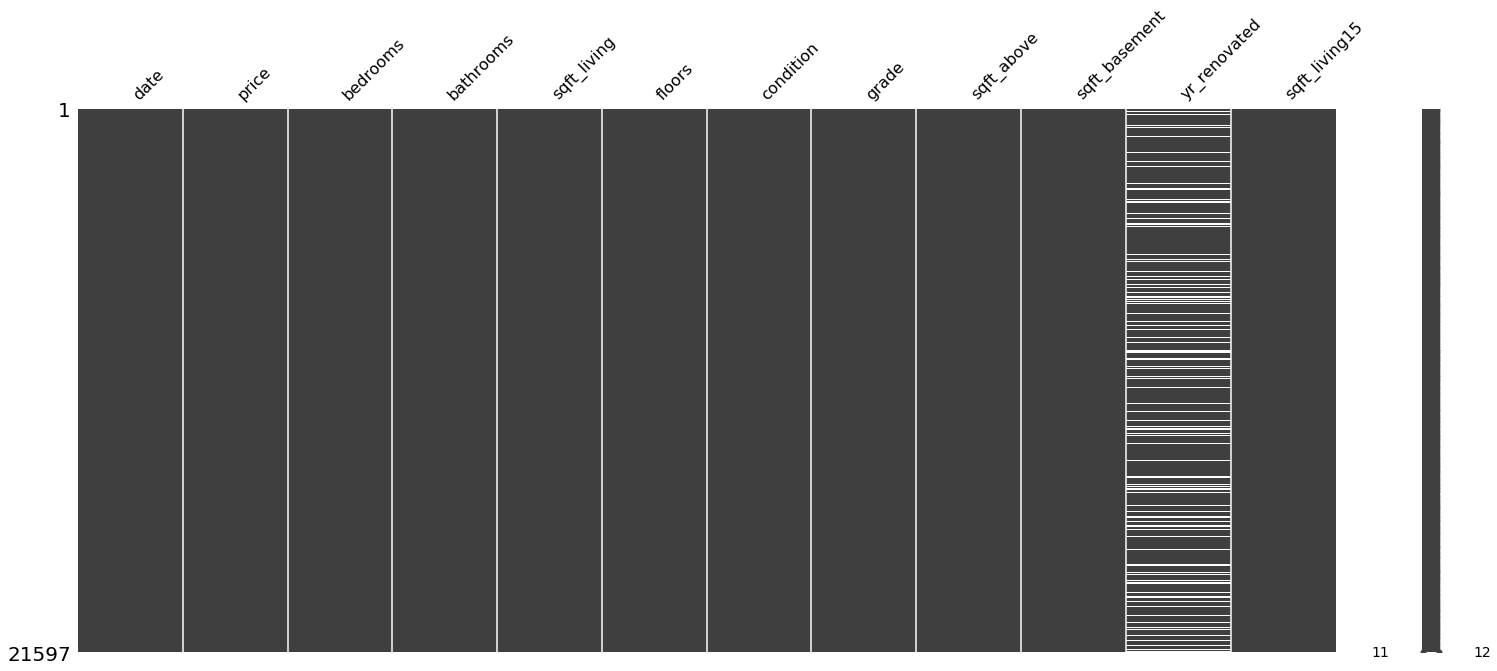

In [17]:
# Seeing if there is a pattern in specific houses that having nulls
import missingno as ms
ms.matrix(house_data)

In [18]:
### cat_cols = house_data.select_dt

In [19]:
### num_cols = house_data.select_dtypes('number').columns
### num_cols

In [20]:
# What columns have null values
house_data.isna().sum()
# We still have nulls in waterfront, view, and sqft_basement
# Going to these sections in the notebook to fix these columns

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
floors              0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_renovated     3842
sqft_living15       0
dtype: int64

In [21]:
# Fix sqft of basement first
house_data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
450.0       103
480.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
550.0        76
780.0        76
650.0        75
240.0        74
380.0        73
680.0        73
850.0        72
360.0        72
940.0        71
770.0        71
910.0        71
290.0        69
1200.0       69
440.0        69
880.0        69
520.0        68
350.0        68
630.0        66
920.0        66
960.0        65
730.0        65
740.0        64
430.0        64
640.0        63
1010.0       63
760.0        63
560.0        62
950.0        62
280.0        62
340.0        62
570.0        62
820.0        62
460.0        61
790.0        61
1060.0       58
310.0        58
980.0        57
830.0        56
810.0        55
540.0   

In [22]:
# Fixing the '?'
house_data['sqft_basement'].replace('?', np.nan, inplace = True) 
# Changing the dtype to float instead of string
house_data['sqft_basement'] = house_data['sqft_basement'].astype('float')

In [23]:
house_data['sqft_basement'].replace('?', '0')

0          0.000
1        400.000
2          0.000
3        910.000
4          0.000
5       1530.000
6            nan
7          0.000
8        730.000
9          0.000
10      1700.000
11       300.000
12         0.000
13         0.000
14         0.000
15       970.000
16         0.000
17         0.000
18           nan
19         0.000
20       760.000
21       720.000
22         0.000
23         0.000
24         0.000
25         0.000
26       700.000
27         0.000
28       730.000
29         0.000
30         0.000
31         0.000
32       820.000
33         0.000
34       780.000
35       790.000
36       730.000
37         0.000
38       330.000
39         0.000
40         0.000
41      1620.000
42           nan
43         0.000
44       360.000
45         0.000
46         0.000
47         0.000
48         0.000
49       588.000
50         0.000
51      1510.000
52       410.000
53       990.000
54       600.000
55         0.000
56         0.000
57         0.000
58         0.0

In [24]:
house_data['sqft_basement'].nunique()

303

In [25]:
# Nulls will be changed to the mode of 0.0 for basement sqft 
house_data['sqft_basement'].mode()
house_data = house_data['sqft_basement'].fillna(0.0, axis = 0)

In [26]:
# Changing 'sqft_basement' to int64
house_data['sqft_basement'].astype('int64')

KeyError: 'sqft_basement'

In [ ]:
### Data type is an object and needs to be changed to int64
house_data['date'].value_counts()

In [ ]:
# Changing the date column into a datetime
house_data['date'] = pd.to_datetime(house_data['date'])
# Making a new column for year
house_data['year'] = house_data['date'].dt.year
# Making a new column for month
house_data['month'] = house_data['date'].dt.month 
# Making a new column for day
house_data['day'] = house_data['date'].dt.dayofweek

In [ ]:
house_data = house_data.drop(['date'], axis = 1)

In [ ]:
house_data.info()

In [ ]:
house_data.info()

In [ ]:
house_data = house_data.drop(columns=['year', 'day'], axis = 1)
house_data.head()

In [ ]:
# Removing null values and changing the data type to integer
house_data['yr_renovated'].mode()
house_data['yr_renovated'].fillna(0.0, axis = 0, inplace = True)
house_data['yr_renovated'] = house_data['yr_renovated'].astype('int')
house_data['yr_renovated'].value_counts()

In [ ]:
# There are many houses that dont have renovation
# Will make these Booleans with this function below

for i in house_data['yr_renovated']:
    if i > 0:
        house_data['yr_renovated'].replace(i, 1, inplace = True)

# Change column name
house_data['was_renovated'] = house_data['yr_renovated']
house_data.drop(['yr_renovated'], axis = 1, inplace = True)

print(house_data['was_renovated'].value_counts())
house_data.head()

In [ ]:
# Is there anymore we need to fix before outlier removal?
house_data.head()
house_data.isna().sum()

In [ ]:
house_data.isna().sum()
# Yay, there are no more null values

In [ ]:
house_data.month.value_counts()

In [ ]:
# Making seasons to see what time of year might have the highest selling points
def seasons(x):
    if x > 0 and x < 4:
        season = 1
    elif x > 3 and x < 7:
        season = 2
    elif x > 6 and x < 10:
        season = 3
    else:
        season = 4       
    return season

In [ ]:
house_data['seasons'] = house_data['month'].map(seasons)

In [ ]:
house_data.seasons.value_counts()
# The best = Season 2
# The worst = Season 1

In [ ]:
house_data['has_basement'] = house_data['sqft_basement'].map(lambda x: x!=0 )

In [ ]:
house_data['has_basement'] = house_data['has_basement'].astype('int64')

In [ ]:
house_data.has_basement.value_counts()

# Exploring

In [ ]:
# A good method to understand the spread of each variable is through plotting

# Creating a function to make scatter plots
def scatterplot(col):
    ax = plt.figure(figsize = (8,6))
    ax = sns.scatterplot(x = house_data[col], y = house_data['price'])
    ax.set_title('{} vs. Price'.format(col), fontsize = 18)
    ax.set_xlabel('{}'.format(col), fontsize = 14)
    ax.set_ylabel('Sale Price', fontsize = 14);

for col in house_data:

    scatterplot(col)

In [ ]:
# Defining the features that might work better as categories
house_data['condition'] = house_data['condition'].astype('category')
house_data['seasons'] = house_data['seasons'].astype('category')
house_data['month'] = house_data['month'].astype('category')

In [ ]:
house_data.info()

In [ ]:
# Plotting Price with the categories:
def categorical_plots(df):
    for col in df.select_dtypes('category'):
        fig, ax = plt.subplots(figsize=(10,6))
        sns.barplot(x=col, y='price', data=df, palette="colorblind")
        ax.set_title(f"{col} vs Price", fontsize=30)
        plt.xticks(rotation=45)
        plt.show()

In [ ]:
categorical_plots(house_data)

### Multicolinearity

In [ ]:
# We will be dropping zipcode, lat, and long from this model as they have to do with location
# which the homeowner cannot change
df1 = house_data.copy()
df1.head()

In [ ]:
# Checking for correlation in features before we go to remove outliers
corr1 = df1.iloc[:,2:] 
corr1.corr().abs().style.background_gradient(cmap='coolwarm')

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df1.corr().abs(), center=0, annot=True, linewidths=1.5, cmap='coolwarm');
ax.set_ylim(len(df1.corr())-0, -0.5)

**To note:
There are some features that have high correlation that will need to be addressed later on**
    

### Modeling before Addressing Outliers

In [ ]:
features = '+'.join(house_data.drop('price', axis = 1).columns)
formula = 'price ~' + features
model1 = smf.ols(formula, house_data).fit()
model1.summary()

This already tells us a lot about our initial data. To start we can see that our r-squared value is 0.767 which is very high. The 'Skew' value is 4.919, showing that the data has outliers that need to be addressed. The 'Kurtosis' value is 70.740, also showing heavy tails. Warnings also tell us that there may be issues with strong multicolinearity.

In [ ]:
model1.params

In [ ]:
model1.resid.mean()

In [ ]:
# QQ plot to see if our data is linear
fig1 = plt.figure(figsize = (12,6))
fig1 = sm.graphics.qqplot(model1.resid,fit=True, line='45');

Wow, that's a really bad QQ plot result. Removing outliers will hopefully fix this issue

In [ ]:
# I have a feeling that this scatterplot will show our data is heteroscadastic
# But for good measure will go ahead and make it
sns.scatterplot(house_data['price'], model1.resid, );

This visual clearly shows that we have some outliers in price. Now we will move on to remove them and see the difference.

In [ ]:
# Function for running models and checking the data's changes
def model_fun(df, target='price', test_size=0.25):
    X = df.drop([target], axis=1)
    y = df[[target]]    
# Defining training test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=test_size, 
                                                        random_state=123)
# Defining df with the split data
    df_train = pd.concat([y_train, X_train], axis=1)
    df_test = pd.concat([y_test, X_test], axis=1) 
# Getting the categorical columns
    cat_cols = df_train.select_dtypes('category').columns
# Making the model summary
    features = '+'.join(df_train.drop(columns=target).columns)
# Looping through categoricals to make the formula
    for col in cat_cols:
        features = features.replace(col,f'C({col})')   
    formula = target + '~' + featuresl
    model = smf.ols(formula, df_train).fit()
# QQ plot of the residuals for normality
    fig, axes = plt.subplots(ncols=2, figsize=(20, 5))
    sm.graphics.qqplot(model.resid, fit=True, line='45', ax=axes[0])
    axes[0].set_title('QQ Plot of Residuals', fontsize=20)
# Homoscedasticity of Residuals
    ax=axes[1]
    ax.scatter(df_train['price'], model.resid)
    ax.axhline(0, color='red')
    axes[1].set_title('Homoscedasticity of Residuals', fontsize=20)
    plt.show();

# Getting the predicted y values from the model
    y_predicted = model.predict(X_test)
    
# Plotting a scatterplot of the training vs original test data prices e
    plt.figure(figsize=(20,5))
    g = sns.scatterplot(range(len(y_predicted[:200])), y_predicted[:200], 
                        label='Predicted Prices')
    g = sns.scatterplot(range(len(y_test[:200])), y_test.price[:200], 
                        label='Actual Prices')

# Visual titles, labels, and legends of the plots
    plt.title('Comparison of predicted vs actual price', 
              fontdict={'fontsize':20})
    plt.xlabel('Values')
    plt.ylabel('Prices')
    plt.legend()
    plt.show();
    
# Generating the r2 for the test data to compare to the train data 
    r2_test = r2_score(y_test, y_predicted)
    print('Model test data R2 score:', r2_test)
# Displaying everything
    display(model.summary())
    return model

In [ ]:
functionmodel1 = model_fun(house_data)

# Data Cleaning

### Outlier Removal

In [ ]:
# Let's start by making some boxplots to see if there are obvious outliers
for column in house_data.columns:
    plt.figure(figsize = (8,4))
    sns.boxplot(house_data[column])
    plt.title('{}'.format(column))
    plt.show()

In [ ]:
# After researching outlier removal 
# and exploring our data it is best to do IQR type outlier removal methods

def outliersiqr(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    threshold = iqr * 1.5
    outliers = (data < q1 - threshold) | (data > q3 + threshold)
    outliers = pd.Series(outliers, index=data.index)
    return outliers

In [ ]:
# Function to make an outlier column which we will then remove outliers from
def outlierscolumn(df, columns, verbose=True):
    new_df = df.copy()
    for col in columns:
        outliers = outliersiqr(new_df[col])
        if verbose:
            print(f'{outliers.sum()} outliers found in {col}')
        new_df[f'{col}_outliers'] = outliers
    return new_df

In [ ]:
# Feeding in the numerical columns for identifying outliers
num_cols = list(house_data.select_dtypes('number').columns)

# Saving the new dataframe with outlier columns added
df2 = outlierscolumn(house_data, num_cols)

In [ ]:
df2.head()

In [ ]:
df2.shape

In [ ]:
# Dropping columns that are either continous or boolean (yes or no, has or doesn't have)
df2= df2.drop(columns=['was_renovated_outliers', 'has_basement_outliers', 'bedrooms_outliers',  
                        'bathrooms_outliers', 'grade_outliers'])

In [ ]:
df2.head()

In [ ]:
# Creating a list of the outlier columns
outliercols = []
for col in df2.columns:
    if 'outliers' in col:
        outliercols.append(col)
outliercols

In [ ]:
# Filtering the outliers out of my dataframe and returning only the entries
# that are not outliers for any of the features
for col in outliercols:
    df2 = df2[(df2[col]==False)]
df2.shape

In [ ]:
# Dropping the outlier columns that were added
for col in outliercols:
    df2.drop(columns=[col], axis=1, inplace=True)

In [ ]:
df2.info()

In [ ]:
df2.describe()

In [ ]:
# Time to make a model to see the difference
functionmodel2 = model_fun(df2)

Notes: This is some great improvement from our last model. We can see that the QQ plot is better distributed alone our line of fit. Homodescedasticisity is also better and fits the line better. We can still improve more with other transformations possibly.

Our R-squared value is very low though which means that we are not doing a good job of explaining what features influence the model.

In [ ]:
df2.bedrooms.value_counts()

In [ ]:
# Removing the obvious bedroom outliers here
df2 = df2[(df2['bedrooms']!=33)]

In [ ]:
df2.bedrooms.value_counts()

In [ ]:
df2.describe()

In [ ]:
# Removing the obvious bedroom outliers here
df2 = df2[(df2['bathrooms']!=5.75)]

In [ ]:
df2.describe()

### Linearity, Normality, & Homoscedasticity

In [ ]:
# Let's look at the target price first
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(df2['price'], bins='auto')

# Adjusting the money ticks 
# fmt_money = '${x:,.0f}'

In [ ]:
# To start I want to go ahead and limit the target: price column 
# to only have houses in the majority range $0-$1,000,000
df2 = df2[(df2['price']<=1000000)]

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(df2['price'], bins='auto')

In [ ]:
df2['price'].describe()
# Now our target is limited to 1,000,000 and under

In [ ]:
# Function to make vizuals to show normality
def normalityplots (df, column):
    plt.figure(figsize = (12,4))
    plt.subplot(1,2,1)
    df[column].hist(bins = 30)
    plt.subplot(1,2,2)
    stats.probplot(df[column], dist = 'norm', plot = plt)
    plt.title('{}'.format(column))
    plt.show()

# Now let's see the results of the outlier removal
for column in df2.columns:
    normalityplots(df2, column)

In [ ]:
df2.hist(figsize = (14,14));

In [ ]:
# Creating a function that will create a joint plot to vizualize linearity against our target price
def jointplot(df, col, target = 'price'):
    g = sns.jointplot(data = df, x = col, y = target, kind = 'reg')
    plt.suptitle(f"{col} vs. {target}");
    return g

for col in df2.columns:
    jointplot(df2, col)

Our data and feature columns look a bit more normal now. I will need to drop more columns though before I make a new model as they aren't normally distributed or don't make sense for the model and/or I won't be using it for recommendations of how to improve the house.

In [ ]:
df2.drop(columns=['sqft_basement'], inplace=True)

In [ ]:
df2.head()

Notes:

### Low p-value Removal

In [ ]:
# Function to identify the insignificant p-values
def bad_pvalues(model, verbose=True):
    
#     Pulling out the p-values and identifying the ones above .05
    pvalues = model.pvalues
    bad_features = pvalues[pvalues > .05]
    
#     Excluding the intercept in case it has a high p-value
    if 'Intercept' in bad_features:
        bad_features.remove('Intercept')
        
#      Printing a statement of the bad p-values
    if verbose:
        print(f'{len(bad_features)} bad p-values to be reviewed:\n' 
              + f'{bad_features}')
    return bad_features

In [ ]:
model2_bad_pvals = bad_pvalues(model1)

In [ ]:
# We can see from the low values that month has many low p-value features
# We will be removing zipcode and month
df3 = df2.copy()
df3.drop(columns=(['month']), inplace=True)
df3.shape

In [ ]:
# Model summary to see the changes if significant
functionmodel3 = model_fun(df3)

Notes: 

### Multicolinearity Column/Feature Removal

In [ ]:
# Creating a heat map again to see our new data
corr3 = df3.iloc[:,2:] 
corr3.corr().abs().style.background_gradient(cmap='Reds')

In [ ]:
# There is a high correlation betweeon sqft_above and sqft_living15
# Note even sure what sqftliving15 is exactly so we will be dropping this column

In [ ]:
df4 = df3.copy()
df4= df4.drop(columns=['sqft_living15', 'sqft_above'])

In [ ]:
# Model to see difference
functionmodel4 = model_fun(df4)

In [ ]:
df4.describe()

# 3. Will multicollinearity affect what feature yields the highest selling price?

Notes: This didn't create too much change. Also to note the warning message at the bottom of the screen is still appearing.

# 1. What outlier removal method is the most effective?

In trying multiple outlier removal methods above and not included in our notebook we found that the most effective outlier removal system was IQR outlier removal. 

Other methods tried that are not included on the notebook and can be found in the "leftovers" notebook:

*Log Transformation

*One Hot Encoding

# 2. What effect does outliers have on our outcomes and overall data?

Above we have created a training model to see the difference that outlier removal had on our data. 

The QQ plot and Homodescacidisity plot show that there was improvement in our residuals

# Recommendations

Homeowners are able to control the following variables/features of their house. My improving or increasing these features the homeowners can possibly increase the worth of their home when selling.

In [ ]:
functionmodel3.params

In [ ]:
# Convert the coefficient series to a sorted dataframe

coeffs_df = functionmodel3.params.to_frame()
coeffs_df.columns = ['coefficients']
coeffs_df = coeffs_df.sort_values('coefficients', ascending = False)
coeffs_df.style.background_gradient(cmap = 'Reds').set_caption('Coefficients')

In [ ]:
coeffs_df = coeffs_df.transpose()
coeffs_df

In [ ]:
def multicol_plot(df):
    
#   Creating a temporary new dataframe
    new_df = df.copy()
    
#   Converting the category types to int so they will show up in the heatmap
    categories = new_df.select_dtypes('category')
    for col in categories:
        new_df[col]= new_df[col].astype('int64')  
        
#   Generating the correlation chart 
    corr = abs(new_df.corr())
    
#   Creating a mask that will eliminate redundant values in the heatmap
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    
#   Plotting the figure and applying the mask
    fig = plt.figure()
    fig.set_size_inches(12,12)
    sns.heatmap(corr, annot=True, mask=mask)
    plt.show();
    
    display(corr)
    return corr

In [ ]:
df4_corr = multicol_plot(df4)

# 4. What features of a house yield make the house sell at a higher price?
As we can see from the above Coefficient Mapping tool we can see that renovation, condition, and grade had the highest impact on yielding a higher selling price.




### Improve the Grade of the House

1-3 - Falls short of minimum building standards. Normally cabin or inferior structure.

4 - Generally older, low quality construction. Does not meet code.

5 - Low construction costs and workmanship. Small, simple design.

6 - Lowest grade currently meeting building code. Low quality materials and simple designs.

7 - Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 - Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 - Better architectural design with extra interior and exterior design and quality.

10 - Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 - Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 - Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 - Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [ ]:
# Setting a figure size and plotting
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='grade', y='price', data=df4, palette="colorblind")

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting title and labels
ax.set_xlabel('Grade', fontsize=15)
ax.set_ylabel('Price of Home', fontsize=15)
ax.set_title('Home Price By Grade', fontsize=20);

In [ ]:
# Regplot

fig, ax = plt.subplots(figsize=(12,8))
sns.regplot(df4['grade'], df4['price'], line_kws={'color':'red'})
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)
ax.set(xlim=(2, 12))
ax.set_xlabel('Grade', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Home Price By Grade', fontsize=20);

### Increase the Number of Bedrooms

In [ ]:
# Setting a figure size and plotting
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='bedrooms', y='price', data=df4, palette="colorblind")

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting title and labels
ax.set_xlabel('Number Of Bedrooms', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Average Home Price By Number Of Bedrooms', fontsize=20);

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.regplot(df4['bedrooms'], df4['price'], line_kws={'color':'red'})

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting the range of the x-ticks
ax.set(xlim=(2, 12))

# Setting title and labels
ax.set_xlabel('Bedrooms', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Home Price By Grade', fontsize=20);

### Increase the Number of Bathrooms

In [ ]:
# Setting a figure size and plotting
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='bathrooms', y='price', data=df4, palette="colorblind")

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting title and labels
ax.set_xlabel('Number Of Bathrooms', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Average Home Price By Number Of Bathrooms', fontsize=20);

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.regplot(df4['bathrooms'], df4['price'], line_kws={'color':'red'})

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting the range of the x-ticks
ax.set(xlim=(2, 12))

# Setting title and labels
ax.set_xlabel('Bathrooms', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Home Price By Grade', fontsize=20);

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(df4['bathrooms'], df4['price'])

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

### Square Footage of Upper Floors

In [ ]:
df4.head()

In [ ]:
# Regplot for sqft

fig, ax = plt.subplots(figsize=(12,8))
sns.regplot(df4['sqft_living'], df4['price'], 
            scatter_kws = {'color': 'blue', 'alpha': 0.3}, 
            line_kws = {'color': 'purple', 'alpha': 0.3})

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting title and labels
ax.set_xlabel('Square Feet', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Home Price By Squarefoot Living Space', fontsize=20);

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(df4['sqft_living'], df4['price'])

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)


Recommendations:
    

### Improve the Condition of the House

In [ ]:
# Setting a figure size and plotting
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='condition', y='price', data=df4, palette="colorblind")

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting title and labels
ax.set_xlabel('Condition', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Average Home Price By Condition of Home', fontsize=20);

### Add a Floor to the Home

In [ ]:
# Setting a figure size and plotting
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='floors', y='price', data=df4, palette="colorblind")

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting title and labels
ax.set_xlabel('Floors', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Average Home Price By Number of Floors', fontsize=20);

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.regplot(df4['floors'], df4['price'], line_kws={'color':'red'})

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting the range of the x-ticks
ax.set(xlim=(2, 12))

# Setting title and labels
ax.set_xlabel('Floors', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Home Price By Number of Floors', fontsize=20);

# Tableau Map

# Future Work

1. With more time given, I would also like to utilize the latitude and longitude given in this dataset to make a Tableau map.
2. I would additionally experiment more with different outlier removals including Cooks Distance.